# Supervised Learning and Unsupervised Learning

 En esta sección compararemos el funcionamiento de ambos tipos de algoritmos de aprendizaje. Para esto utilizaremos dos algoritmos de classificación, k-Nearest Neighbors (kNN) el cual sera el algoritmo supervisado y por el lado de los algoritmos no supervisados tendremos k-Means. 

 Amplicaremos ambos algoritmos a *iris dataset*, el cual nos entrega cuatro caracteristicas del ancho y largo tando del sépalo como del pétalo de las flores de iris. Con estos datos se intenta predecir a que subespecie de flor corresponde, iris setosa, iris versicolor o iris virginica.
 
 Basicamente tendremos 4 dimensiones de entrada y 3 posibles clasificaciones de salida


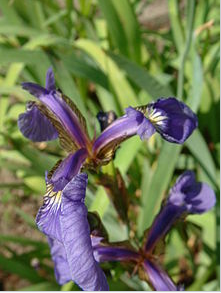

## kNN

Este algoritmo predice a que grupo pertenece un nuevo elemento a partir de los k elementos mas cercanos ya etiquetados previamente. Para esto busca los k elementos y luego realiza una votación la cual suele ser un elemento un voto.

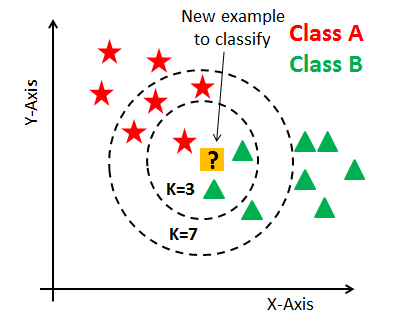

### Aplicando kNN al Dataset

In [ ]:
# Importamos las librerias basicas para el código

import numpy as np 
import matplotlib.pyplot as plt 

In [ ]:
# Importamos el dataset de iris
from sklearn.datasets import load_iris

iris_dataset = load_iris()   # Cargamo el dataset en una variable
iris_dataset.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [ ]:
#Acomodamos la data a la notación conocida
X = iris_dataset.data[:,0:2] #Utilizaremos solo las dos primeras caractetisticas para facilitar la visualización en el plano
y = iris_dataset.target

print(np.shape(X))
iris_dataset.target_names

(150, 2)


array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

<function matplotlib.pyplot.show>

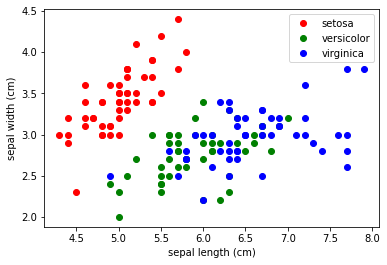

In [ ]:
# Graficamos la data

plt.plot(X[y == 0][:,0],X[y == 0][:,1], 'ro')
plt.plot(X[y == 1][:,0],X[y == 1][:,1], 'go')
plt.plot(X[y == 2][:,0],X[y == 2][:,1], 'bo')

plt.xlabel(iris_dataset.feature_names[0])
plt.ylabel(iris_dataset.feature_names[1])

plt.legend(iris_dataset.target_names)

plt.show

In [ ]:
#Separamos la data entre data de entrenamiento y data de test

from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [ ]:
# Aplicamos kNN a la data

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)

prediction = knn.predict(X_test)

print(np.sum(prediction)/len(prediction))



0.8888888888888888


#### Funciones necesarios para las gráficas

In [ ]:
# funciones necesaria para visualizar la data

def make_prediction_grid(knn_model, limits, h):
  ''' This function takes a model and evaluate his prediction in a hxh meshgrid and return the meshgrid (xx, yy) and the prediction values (prediction grid).'''
  x_min, x_max, y_min, y_max = limits
  xs = np.linspace(x_min,x_max,h)
  ys = np.linspace(y_min,y_max,h)
  xx, yy = np.meshgrid(xs,ys)
    
  prediction_grid = np.zeros(xx.shape, dtype = int)

  for i,x in enumerate(xs):
    for j,y in enumerate(ys):
      p = np.array([x,y])
      prediction_grid[j,i] = knn_model.predict(np.array([x,y]).reshape(1,-1))
            
  return (xx, yy, prediction_grid) 


def plot_prediction_grid (xx, yy, prediction_grid):
    """ Plot KNN predictions for every point on the grid."""
    from matplotlib.colors import ListedColormap
    background_colormap = ListedColormap (["hotpink", "yellowgreen", "lightskyblue"])
    plt.figure(figsize =(10,10))
    plt.pcolormesh(xx, yy, prediction_grid, cmap = background_colormap, alpha = 0.5)
    plt.xlabel('Variable 1'); plt.ylabel('Variable 2')
    plt.xticks(()); plt.yticks(())
    plt.xlim (np.min(xx), np.max(xx))
    plt.ylim (np.min(yy), np.max(yy))

#### Gráfica de los resultados

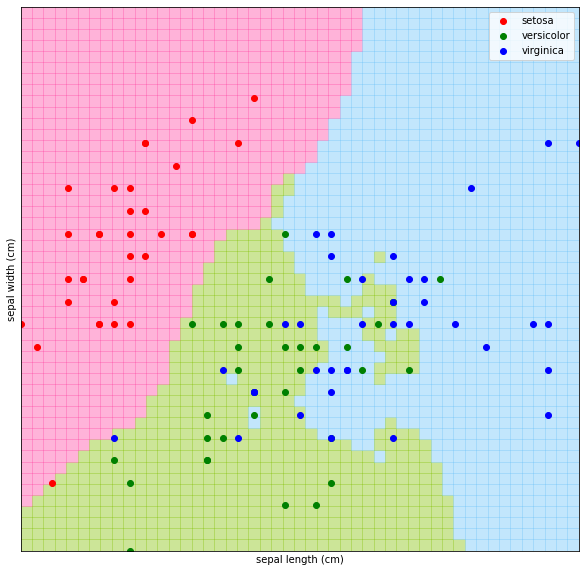

In [ ]:
# Visualizamos las predicciones de kNN

xx, yy, prediction_grid = make_prediction_grid(knn_model = knn, limits = [np.min(X[:,0]), np.max(X[:,0]), np.min(X[:,1]), np.max(X[:,1])], h = 50)

plot_prediction_grid (xx, yy, prediction_grid)

plt.plot(X_train[y_train == 0][:,0], X_train[y_train == 0][:,1], 'ro')
plt.plot(X_train[y_train == 1][:,0], X_train[y_train == 1][:,1], 'go')
plt.plot(X_train[y_train == 2][:,0], X_train[y_train == 2][:,1], 'bo')

plt.xlabel(iris_dataset.feature_names[0])
plt.ylabel(iris_dataset.feature_names[1])


plt.legend(iris_dataset.target_names)

plt.show()

    

Arriba  se muestra en 

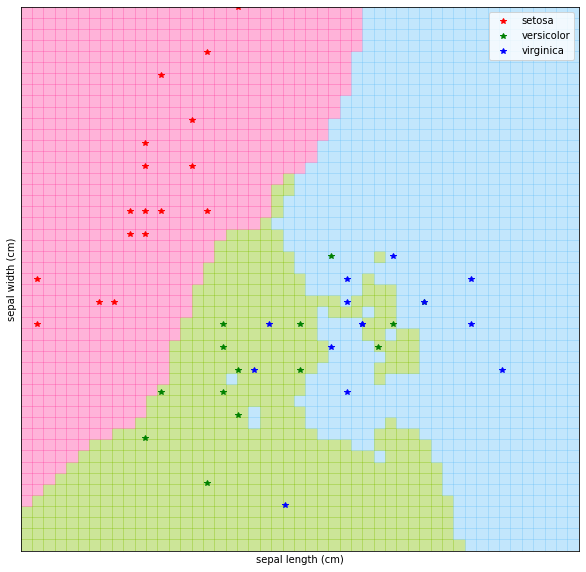

In [ ]:
plot_prediction_grid (xx, yy, prediction_grid)

plt.plot(X_test[y_test == 0][:,0], X_test[y_test == 0][:,1], 'r*')
plt.plot(X_test[y_test == 1][:,0], X_test[y_test == 1][:,1], 'g*')
plt.plot(X_test[y_test == 2][:,0], X_test[y_test == 2][:,1], 'b*')

plt.xlabel(iris_dataset.feature_names[0])
plt.ylabel(iris_dataset.feature_names[1])


plt.legend(iris_dataset.target_names)

plt.show()




In [ ]:
# Para ver cuantas veces acerta el algorimos los siguientes parametros
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

y_pred_knn = knn.predict(X_test)
print([(y_test[i], y_pred_knn[i]) for i in range(len(y_test)) ])
print('Confusión Matrix: \n', confusion_matrix(y_test, y_pred_knn))
print('Precision Score: \n', accuracy_score(y_test, y_pred_knn))

[(1, 1), (0, 0), (2, 2), (0, 0), (0, 0), (2, 1), (0, 0), (1, 1), (1, 1), (0, 0), (0, 0), (0, 0), (2, 1), (0, 0), (1, 1), (2, 1), (0, 0), (1, 1), (1, 1), (0, 0), (1, 1), (2, 2), (2, 2), (2, 1), (0, 0), (1, 2), (0, 0), (1, 2), (1, 1), (2, 1), (1, 1), (0, 0), (0, 0), (0, 0), (2, 1), (2, 2), (1, 2), (2, 2), (1, 2), (2, 2), (1, 1), (0, 0), (0, 0), (2, 2), (2, 2)]
Confusión Matrix: 
 [[17  0  0]
 [ 0 10  4]
 [ 0  6  8]]
Precision Score: 
 0.7777777777777778


## K-Means

K-Means busca minimizar k medias sobre el dataset, clasificando la data en k subgrupos. Matematicamente se busca minimizar la siguiente función:

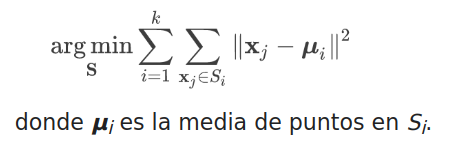

Para esto utiliza un método iterativo en el cual partiendo de k puntos inciales aleatorios busca reducir dichas medias. 

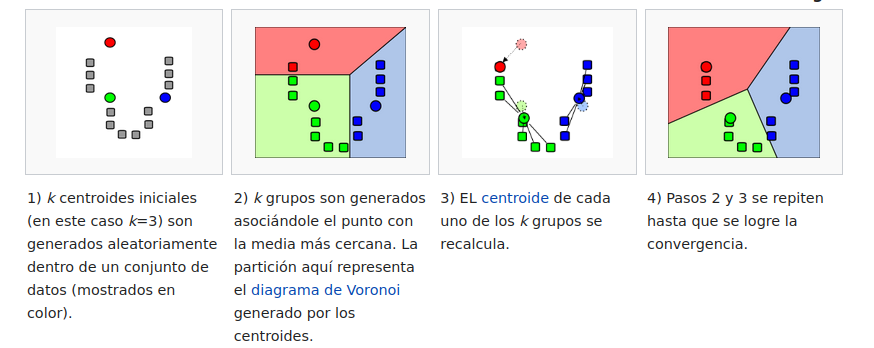

In [ ]:
# Importamos el algoritmo desde sklearn y lo implementamos con k = 3, ya que sabemos desde antes que este es el numero de subgrupos del dataset

from sklearn.cluster import KMeans


kMeans = KMeans(n_clusters=3)
kMeans.fit(X_train)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

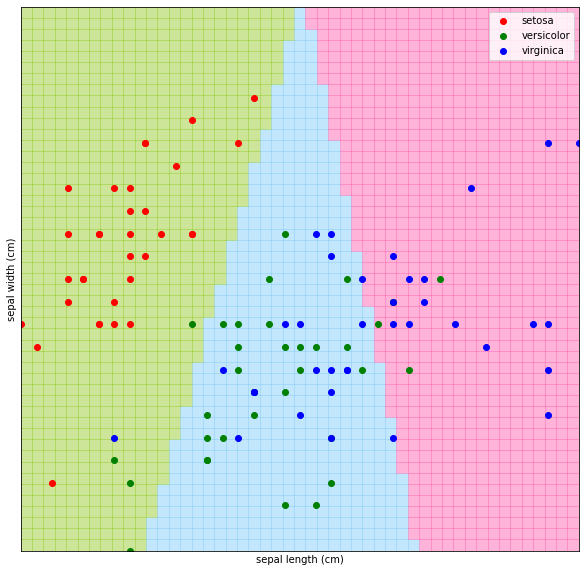

In [ ]:
# Implementamos la misma gráfica que la que utilizamos para kNN

xx, yy, prediction_grid = make_prediction_grid(knn_model = kMeans, limits = [np.min(X[:,0]), np.max(X[:,0]), np.min(X[:,1]), np.max(X[:,1])], h = 50)

plot_prediction_grid (xx, yy, prediction_grid)

plt.plot(X_train[y_train == 0][:,0], X_train[y_train == 0][:,1], 'ro')
plt.plot(X_train[y_train == 1][:,0], X_train[y_train == 1][:,1], 'go')
plt.plot(X_train[y_train == 2][:,0], X_train[y_train == 2][:,1], 'bo')

plt.xlabel(iris_dataset.feature_names[0])
plt.ylabel(iris_dataset.feature_names[1])


plt.legend(iris_dataset.target_names)

plt.show()

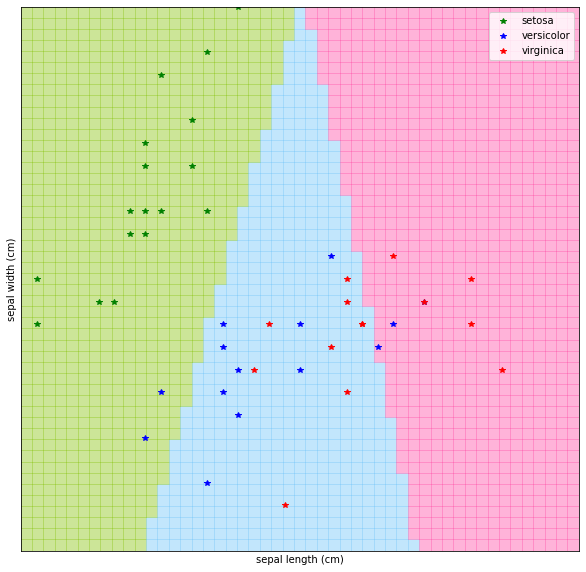

In [ ]:
plot_prediction_grid (xx, yy, prediction_grid)

plt.plot(X_test[y_test == 0][:,0], X_test[y_test == 0][:,1], 'g*')
plt.plot(X_test[y_test == 1][:,0], X_test[y_test == 1][:,1], 'b*')
plt.plot(X_test[y_test == 2][:,0], X_test[y_test == 2][:,1], 'r*')

plt.xlabel(iris_dataset.feature_names[0])
plt.ylabel(iris_dataset.feature_names[1])


plt.legend(iris_dataset.target_names)

plt.show()


En este caso el color asignado a la data no se corresponde con el que nos entrega el algoritmo, esto se debe a que el algoritmo simplemente agrupo la data como mejor le parecio, pero este no identifica a que tipo de flor podria corresponder el subgrupo. Esto último es nuetro trabajo.

In [ ]:
y_pred_kMeans = kMeans.predict(X = X_test)

print([(y_test[i], y_pred_kMeans[i]) for i in range(len(y_test))])

[(1, 2), (0, 1), (2, 0), (0, 1), (0, 1), (2, 2), (0, 1), (1, 2), (1, 1), (0, 1), (0, 1), (0, 1), (2, 2), (0, 1), (1, 2), (2, 2), (0, 1), (1, 1), (1, 2), (0, 1), (1, 2), (2, 0), (2, 2), (2, 2), (0, 1), (1, 2), (0, 1), (1, 0), (1, 2), (2, 2), (1, 2), (0, 1), (0, 1), (0, 1), (2, 2), (2, 2), (1, 0), (2, 2), (1, 2), (2, 0), (1, 0), (0, 1), (0, 1), (2, 0), (2, 0)]


Movemos las etiquetas para poder comparar la salida con los ejemplos

In [ ]:
def relabel(label):
  if label == 0:
    return 2
  elif label == 1:
    return 0
  else:
    return 1

y_pred_kMeans_relabeled = [relabel(y) for y in y_pred_kMeans]

print([(y_test[i], y_pred_kMeans_relabeled[i]) for i in range(len(y_test))])


[(1, 1), (0, 0), (2, 2), (0, 0), (0, 0), (2, 1), (0, 0), (1, 1), (1, 0), (0, 0), (0, 0), (0, 0), (2, 1), (0, 0), (1, 1), (2, 1), (0, 0), (1, 0), (1, 1), (0, 0), (1, 1), (2, 2), (2, 1), (2, 1), (0, 0), (1, 1), (0, 0), (1, 2), (1, 1), (2, 1), (1, 1), (0, 0), (0, 0), (0, 0), (2, 1), (2, 1), (1, 2), (2, 1), (1, 1), (2, 2), (1, 2), (0, 0), (0, 0), (2, 2), (2, 2)]


In [ ]:
# Realizamos medidas de rendimiento
print('Confusión Matrix: \n', confusion_matrix(y_test, y_pred_kMeans_relabeled))
print('Precision Score: \n', accuracy_score(y_test, y_pred_kMeans_relabeled))

Confusión Matrix: 
 [[17  0  0]
 [ 2  9  3]
 [ 0  9  5]]
Precision Score: 
 0.6888888888888889


#### A modo de ejercicio queda repetir en entranamiento del ambos modelos con las 4 dimensiones encontradas en el dataset.

## Algunos conceptos importanted del Machinelearning

### Curse Of Dimensionality

El problema con el numero de dimensiones nace con que para lograr un buen modelo a partir de los algoritmos clasicos necesitariamos que nuestro numero de ejemplos cresca de manera exponencial en funcion del número de dimensiones.

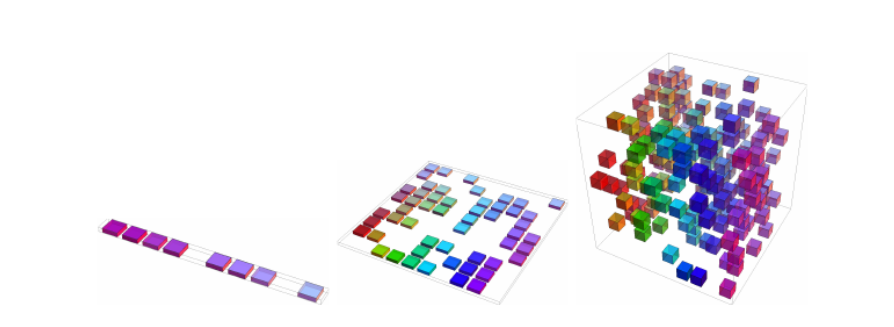

Ademas de esto tenemos el problema del coste computacional de trabajar en alta dimensinalidad.


A continuación se intenta estresar el sistema entrenando com muchas dimensiones al algoritmo pero no se logra, probablemente por el tipo de dataset. Queda para discusión el porque.

In [ ]:
from sklearn.datasets import fetch_openml

In [ ]:
X_mnist, y_mnist = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)

In [ ]:
kNN_2D = KNeighborsClassifier(n_neighbors= 5)
kNN_2D.fit(X_mnist[:, 0:2], y_mnist)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
kNN_100D = KNeighborsClassifier(n_neighbors= 5)
kNN_100D.fit(X_mnist[:, 0:100], y_mnist)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
kNN_784D = KNeighborsClassifier(n_neighbors= 5)
kNN_784D.fit(X_mnist[:, 0:784], y_mnist)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

### Local consistency and Smoothness Regularization

Para conseguir modelos utiles debemos asumir ciertos comportamientos de la data. En este conextro hablaremos de asumir consistencia y que los modelos serán suaves.

El problema de solo trabajar con estos supuestos es que podriamos perder parte estructural de la data, como lo es pa periodicidad.

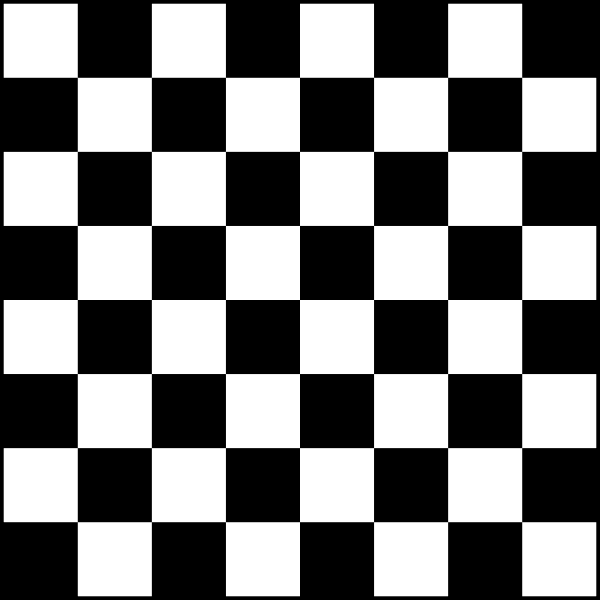

### Manifold Learning

La misma *Curse of Dimensinality* nos invita a evitar realizar computos en espacios con muchas dimensiones. Es en este contecto donde se empieza a trabajar en algoritmos capaces de encontrar una aproximación de la data pero en menor dimensión.

En la imagen abajo se muestra como una data bidimesional podria ser parametrizada en una curva, la cual es un espacio de una dimensión.

Esto mismo podriamos ver en procesamiento de imagenes donde se buscan estructuras en vez de pensar pixel a pixel.

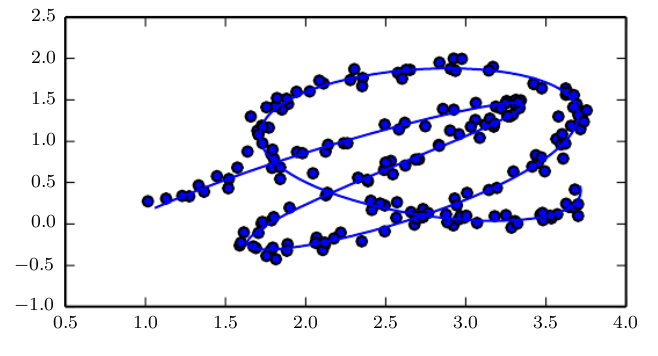